## Linear Regression Models

### Introduction
Linear regression is a fundamental statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features). The goal is to find the best-fitting linear equation that describes the relationship between the variables.

### How Linear Regression Works
Linear regression models the relationship between the dependent variable $ y $ and the independent variables $ X $ using a linear equation:

$ y = Xw + b $

where:
- $ y $ is the dependent variable (target).
- $ X $ is the matrix of independent variables (features).
- $ w $ is the vector of weights (coefficients) for the features.
- $ b $ is the bias term (intercept).

The model aims to find the optimal values for $ w $ and $ b $ that minimize the difference between the predicted values $ \hat{y} $ and the actual values $ y $. This difference is often measured using a loss function, such as Mean Squared Error (MSE):

$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

where $ n $ is the number of data points.

### Training the Model
Training a linear regression model involves finding the optimal weights $ w $ and bias $ b $ that minimize the loss function. This is typically done using optimization techniques such as gradient descent.

### Single Neuron Model
A single neuron model in machine learning is essentially a linear regression model. It consists of a single neuron that takes input features, applies weights and bias, and produces an output. The single neuron model can be represented as:

$ y_{\text{pred}} = Xw + b $

where:
- $ X $ is the input feature matrix.
- $ w $ is the weight vector.
- $ b $ is the bias term.
- $ y_{\text{pred}} $ is the predicted output.

### Using Linear Regression in Single Neuron Model
In the context of a single neuron model, linear regression can be used to predict continuous values. The training process involves:
1. **Initialization**: Randomly initializing the weights and bias.
2. **Forward Pass**: Calculating the predicted output using the linear equation.
3. **Loss Calculation**: Computing the loss using a suitable loss function (e.g., MSE).
4. **Backward Pass**: Calculating the gradients of the loss with respect to the weights and bias.
5. **Parameter Update**: Updating the weights and bias using an optimization algorithm (e.g., gradient descent).

### Example
Consider a dataset with features $ X $ and target $ y $. The steps to train a single neuron model using linear regression are:
1. Initialize weights $ w $ and bias $ b $.
2. For each epoch:
    - Compute the predicted output: $ y_{\text{pred}} = Xw + b $.
    - Calculate the loss: $ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $.
    - Compute the gradients: $ \frac{\partial \text{MSE}}{\partial w} $ and $ \frac{\partial \text{MSE}}{\partial b} $.
    - Update the weights and bias: $ w = w - \eta \frac{\partial \text{MSE}}{\partial w} $ and $ b = b - \eta \frac{\partial \text{MSE}}{\partial b} $, where $ \eta $ is the learning rate.

This first-order method can be carried out iteratively to help the model learn.


First, we will generate a single neuron "linear regressor" class for our experiment. This class includes a typical cost function (Mean Squared Error) as well as some others that we will test later.

In [551]:
import numpy as np
class SingleNeuronLinearRegressor:
    def __init__(self, n_features, learning_rate=0.01):
        # Initialize weights and bias
        self.weights = np.random.randn(n_features)
        self.bias = np.mean(y)  # Set bias to the average of y
        self.learning_rate = learning_rate

    def predict(self, X):
        """
        Forward pass: compute prediction y_pred = Xw + b
        X: shape (n_samples, n_features)
        returns: shape (n_samples,)
        """
        return np.dot(X, self.weights) + self.bias

    def compute_loss(self, y_true, y_pred):
        """
        Computes Mean Squared Error (MSE) loss
        """
        return np.mean((y_true - y_pred) ** 2)

    def train_with_msle_loss(self, X, y, epochs=100):
        """
        Train the neuron on the given data using gradient descent with mean squared logarithmic error (MSLE) loss.
        
        X: shape (n_samples, n_features)
        y: shape (n_samples,)
        epochs: number of iterations for training
        """
        n_samples = X.shape[0]
        self.msle_errors = []

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.predict(X)
            
            # Compute the gradients
            error = np.log1p(y) - np.log1p(y_pred)
            dW = (-2 / n_samples) * np.dot(X.T, error / (y_pred + 1))
            dB = (-2 / n_samples) * np.sum(error / (y_pred + 1))
            
            # Update parameters
            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * dB
            
            # Compute and store the MSLE loss
            loss = np.mean((np.log1p(y) - np.log1p(y_pred)) ** 2)
            self.msle_errors.append(loss)
            
            # Optionally, print the loss every so often
            # if (epoch+1) % 10 == 0:
                # print(f"Epoch {epoch+1}/{epochs}, MSLE Loss: {loss:.4f}")
    
    def train_with_huber_loss(self, X, y, epochs=100, delta=1.0):
        """
        Train the neuron on the given data using gradient descent with Huber loss.
        
        X: shape (n_samples, n_features)
        y: shape (n_samples,)
        epochs: number of iterations for training
        delta: the threshold at which to switch between squared loss and linear loss
        """
        n_samples = X.shape[0]
        self.huber_errors = []

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.predict(X)
            
            # Compute the gradients
            error = y - y_pred
            is_small_error = np.abs(error) <= delta
            dW = np.where(is_small_error, -error, -delta * np.sign(error))
            dB = np.where(is_small_error, -error, -delta * np.sign(error))
            dW = (1 / n_samples) * np.dot(X.T, dW)
            dB = (1 / n_samples) * np.sum(dB)
            
            # Update parameters
            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * dB
            
            # Compute and store the Huber loss
            loss = self.compute_huber_loss(y, y_pred, delta)
            self.huber_errors.append(loss)
            
            # Optionally, print the loss every so often
            # if (epoch+1) % 10 == 0:
            #     print(f"Epoch {epoch+1}/{epochs}, Huber Loss: {loss:.4f}")

    
    def compute_huber_loss(self, y_true, y_pred, delta):
        """
        Compute the Huber loss.
        
        y_true: shape (n_samples,)
        y_pred: shape (n_samples,)
        delta: the threshold at which to switch between squared loss and linear loss
        """
        error = y_true - y_pred
        is_small_error = np.abs(error) <= delta
        squared_loss = 0.5 * error**2
        linear_loss = delta * (np.abs(error) - 0.5 * delta)
        return np.mean(np.where(is_small_error, squared_loss, linear_loss))

        
    def train_with_mae_loss(self, X, y, epochs=100):
        """
        Train the neuron on the given data using gradient descent with mean absolute error (MAE) loss.
        
        X: shape (n_samples, n_features)
        y: shape (n_samples,)
        epochs: number of iterations for training
        """
        n_samples = X.shape[0]
        self.mae_errors = []

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.predict(X)
            
            # Compute the gradients
            error = y - y_pred
            dW = (-1 / n_samples) * np.dot(X.T, np.sign(error))
            dB = (-1 / n_samples) * np.sum(np.sign(error))
            
            # Update parameters
            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * dB
            
            # Compute and store the MAE loss
            loss = np.mean(np.abs(error))
            self.mae_errors.append(loss)
            
            # Optionally, print the loss every so often
            # if (epoch+1) % 10 == 0:
            #     print(f"Epoch {epoch+1}/{epochs}, MAE Loss: {loss:.4f}")

    def train(self, X, y, epochs=100):
        """
        Train the neuron on the given data using gradient descent.
        
        X: shape (n_samples, n_features)
        y: shape (n_samples,)
        epochs: number of iterations for training
        """
        n_samples = X.shape[0]
        self.errors = []

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.predict(X)
            
            # Compute the gradients
            # dL/dw = (-2/n)*X.T(y - y_pred)
            # dL/db = (-2/n)*sum(y - y_pred)
            dW = (-2 / n_samples) * np.dot(X.T, (y - y_pred))
            dB = (-2 / n_samples) * np.sum(y - y_pred)
            
            # Update parameters
            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * dB
            
            # Compute and store the loss
            loss = self.compute_loss(y, y_pred)
            self.errors.append(loss)
            
            # Optionally, print the loss every so often
            # if (epoch+1) % 10 == 0:
                # print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")


## Dataset 

Now, we will introduce our dataset. We will work with an Air Quality Dataset from UC Irvine. The dataset includes 13 features which have to do with various qualities of the air including temperature, humidity, levels of certain pollutants, and time of recording the event.

In [552]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('air_quality.csv', delimiter=';')

# Combine the date and time columns into a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')

# Convert the datetime column to a numerical representation (e.g., Unix timestamp)
df['DateTime_int'] = df['DateTime'].astype(int) / 10**9  # Convert to seconds since epoch

# Move the DateTime_int column to the second position
df.insert(1, 'DateTime_int', df.pop('DateTime_int'))

# Replace all commas with periods
df = df.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)


# Drop the original Date and Time columns non-numeric columns
df.drop(columns=['Date', 'Time', 'DateTime', 'Unnamed: 15', 'Unnamed: 16'], inplace=True)

# Number of rows to remove
num_rows_to_remove = 9100  

# Randomly remove rows (for graphing purposes)
rows_to_remove = df.sample(n=num_rows_to_remove, random_state=42).index
df = df.drop(rows_to_remove)



# Split the data into features and target
X = df.drop(columns=['T'])  # Replace 'target_column' with the actual target column name
y = df['T']  # Replace 'target_column' with the actual target column name

print(f"X: {X.shape}")
print(f"y: {y.shape}")

# Display the first few rows of the dataframe with the new DateTime_int column
print(df.head())



X: (257, 13)
y: (257,)
     DateTime_int CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
64   1.079172e+09    3.2         1447       160     12.9           1081   
98   1.079294e+09    5.9         1898       341     23.1           1381   
161  1.079521e+09    2.9         1438       200     15.4           1161   
189  1.079622e+09    2.2         1322      -200     14.4           1129   
197  1.079651e+09    1.7         1262      -200      8.3            911   

     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
64       250           869      126          1667         1465  12.4  51.2   
98       325           681      173          2103         1905  17.6  46.1   
161      221           819      135          1782         1595  21.1  33.4   
189      149           934      128          1639         1109  27.0  17.8   
197       95           948       99          1545         1062  13.1  64.2   

         AH  
64   0.7335  
98   0.9210  
161  0.8265  
1

/var/folders/y2/tsyh3wpj3mj7zcv4hfd0knl40000gn/T/ipykernel_22673/4203383570.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)


We will create a 'corollelogram' to demonstrate the correlation between the features. It is hard to visualize graphs here unless we pick only two or three features since there are so many dimensions.

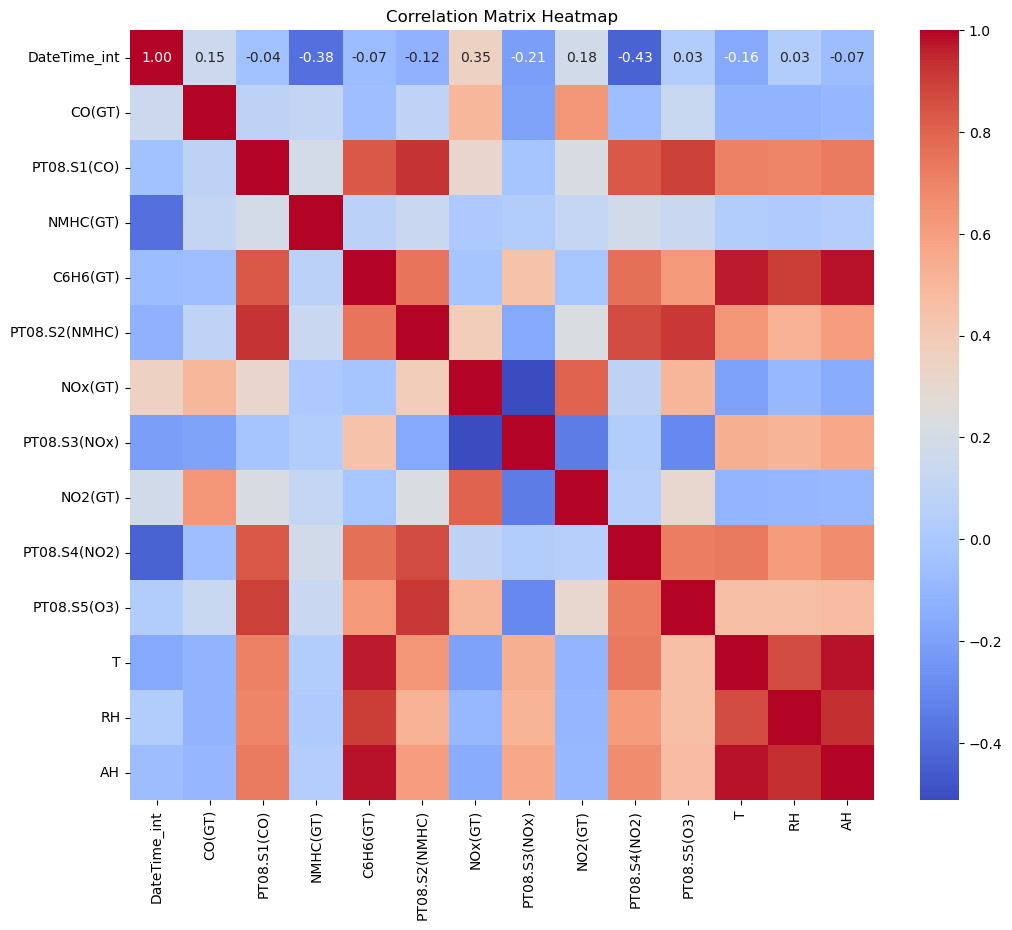

In [553]:
import seaborn as sns

import matplotlib.pyplot as plt

# Convert columns to numeric
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
corr = df_numeric.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Wow! The bottom right corner has some pretty high correlation! This makes sense because T (temperature), RH (relative humididt), and AH (Absolute Humidity) are all weather variables that are closely related.

## Split Data
Next, our job is to split our data into predictive features and a target feature which we want to predict.

X_train_scaled shape: (205, 13)
[[-0.73473281  0.467333   -0.1386223  -0.22922716  0.18075752  0.16621332
  -0.34337613 -0.00941864  0.28015776  0.56843116 -0.40452638  0.191291
   0.20808101]
 [ 0.67309936  0.47496592  0.42620653 -0.22922716  0.17833798  0.15139092
   0.4285554  -0.14891969  0.257148   -0.15941773  0.41505068  0.3591252
   0.201406  ]
 [-1.21808206  0.45715578 -0.36941257 -0.22922716  0.05010223 -0.54229733
  -0.51532297  0.73881424  0.07306999  0.00990059 -0.28048228  0.07614894
   0.19911764]
 [ 0.17425814 -2.09605441  0.19541626 -0.22922716  0.236407    0.40930065
  -1.40798313 -0.28525025 -1.98246781  0.26497754  0.38182458  0.31814243
   0.20690473]
 [-0.91986177  0.46606085 -3.83126668 -0.22922716 -4.89060342 -3.28147658
  -1.40798313 -3.10380548 -1.98246781 -3.5237948  -2.6439653  -4.67785231
  -4.96211617]]
[[-0.73473281  0.467333   -0.1386223  -0.22922716  0.18075752  0.16621332
  -0.34337613 -0.00941864  0.28015776  0.56843116 -0.40452638  0.191291
   0.2080

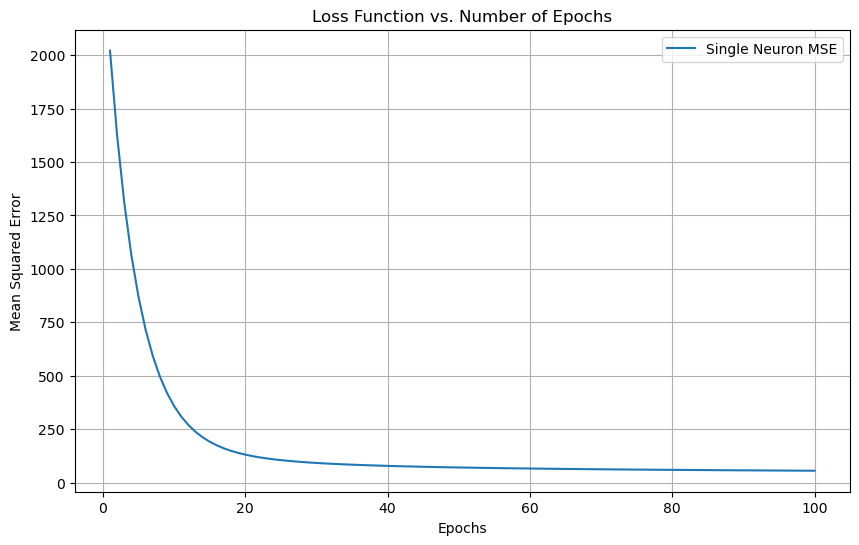

In [554]:

from sklearn.preprocessing import StandardScaler

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Handle NaN values (e.g., fill with mean or drop)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

print(f"X_train_scaled shape: {X_train_scaled.shape}")

# Display the first few rows of the scaled training data
print(X_train_scaled[:5])



# Generate and plot the MSE across epochs
epochs = 100
mse_values = []

# Display the first few rows of the scaled training data
print(X_train_scaled[:5])
print(X_train_scaled.shape[1])
# Train the SingleNeuronLinearRegressor
single_neuron = SingleNeuronLinearRegressor(n_features=X_train_scaled.shape[1], learning_rate=0.01)
single_neuron.train(X_train_scaled, y_train, epochs=epochs)

# Predict and evaluate using the SingleNeuronLinearRegressor
y_pred_single_neuron = single_neuron.predict(X_test)
mse_single_neuron = mean_squared_error(y_test, y_pred_single_neuron)
print(f"Single Neuron MSE: {mse_single_neuron:.4f}")



# Plot the loss function as a function of the number of epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), single_neuron.errors, label='Single Neuron MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Loss Function vs. Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()



Great, It looks like our model is learning the data! But, it's impossible to visualize the "line" we generated graphically because it's in more than three dimensions. Let's plot single features against one another to offer some visualization. 

In the corollelogram above, we found that there's a high positive correlation between the features "T" and "RH". Let's try graphing these against one another:

/var/folders/y2/tsyh3wpj3mj7zcv4hfd0knl40000gn/T/ipykernel_22673/1129671490.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna(X.mean(), inplace=True)
/var/folders/y2/tsyh3wpj3mj7zcv4hfd0knl40000gn/T/ipykernel_22673/1129671490.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna(X.mean(), inplace=True)
/var/folders/y2/tsyh3wpj3mj7zcv4hfd0knl40000gn/T/ipykernel_22673/1129671490.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

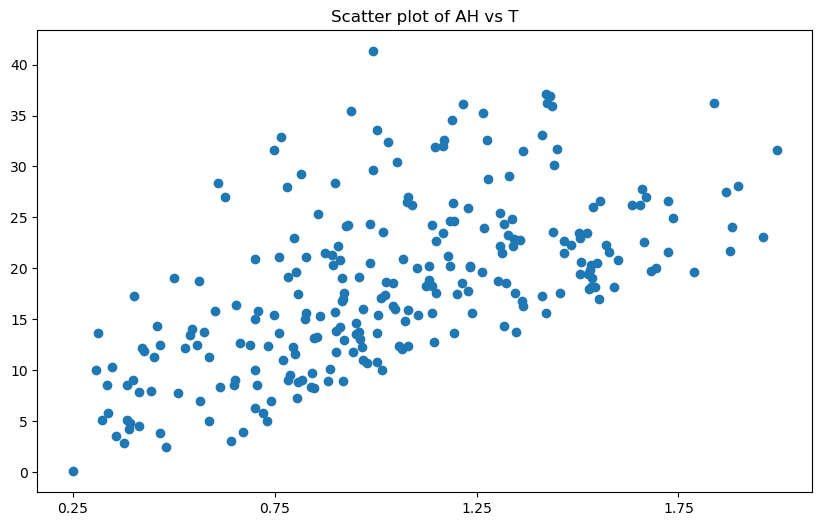

In [555]:
# Specify the column names 
col1 = 'AH'
col2 = 'T'

# Select the first column and assign it to a new DataFrame
df1 = df[[col1]]

# Select the second column and assign it to another new DataFrame
df2 = df[[col2]]

# Convert columns to numeric
df1.loc[:, col1] = pd.to_numeric(df1[col1], errors='coerce')
df2.loc[:, col2] = pd.to_numeric(df2[col2], errors='coerce')

# Handle NaN values (e.g., fill with mean or drop)
df1.fillna(X.mean(), inplace=True)
df2.fillna(y.mean(), inplace=True)


# Calculate the z-scores to identify outliers
z_scores_df1 = np.abs((df1[col1] - df1[col1].mean()) / df1[col1].std())
z_scores_df2 = np.abs((df2[col2] - df2[col2].mean()) / df2[col2].std())

# Define a threshold for identifying outliers
threshold = 3

# Filter out the outliers
df1 = df1[z_scores_df1 < threshold]
df2 = df2[z_scores_df2 < threshold]

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df1[col1], df2[col2], alpha=1)
plt.title(f'Scatter plot of {col1} vs {col2}')
plt.axis('on')  # Turn on the axis
plt.grid(False)  # Turn off the grid

# Define the tick intervals
x_ticks = np.arange(df1[col1].min(), df1[col1].max(), .5)
y_ticks = np.arange(0, df2[col2].max(), 5)

# Set the ticks on the x and y axes
plt.xticks(x_ticks)
plt.yticks(y_ticks)

plt.show()



Now, we will use our single neuron linear regression model on our data.

In [556]:
# Ensure all data is numeric
df1 = df1.apply(pd.to_numeric, errors='coerce')
df2 = df2.apply(pd.to_numeric, errors='coerce')

# Handle NaN values (e.g., fill with mean or drop)
df1.fillna(df1.mean(), inplace=True)
df2.fillna(df2.mean(), inplace=True)

# Split the data into training and testing sets
col1_train, col1_test, col2_train, col2_test = train_test_split(df1, df2, test_size=0.2, random_state=42)

# Scale the training data
scaler = StandardScaler()
col1_train_scaled = scaler.fit_transform(col1_train)

# Reshape col1_train_scaled to match the expected number of features
col1_train_scaled = col1_train_scaled.reshape(-1, 1)

# Generate and plot the MSE across epochs
epochs = 100
mse_values = []

# Train the SingleNeuronLinearRegressor
single_neuron = SingleNeuronLinearRegressor(n_features=col1_train_scaled.shape[1], learning_rate=0.01)
single_neuron.train(col1_train_scaled, col2_train.values.ravel(), epochs=epochs)

print(f"shape of col1_train_scaled: {col1_train_scaled.shape}")
print(f"shape of col2_train: {col2_train.shape}")

# Train the LinearRegressionModel
lr_model = LinearRegression()
lr_model.fit(col1_train_scaled, col2_train.values.ravel())

# print(f"col1_train_scaled shape: {col1_train_scaled.shape}")          # Should be (n_samples, n_features)
# print(f"col1_train_scaled.T shape: {col1_train_scaled.T.shape}")      # Should be (n_features, n_samples)
# print(f"col2_train shape: {col2_train.shape}")          # Should be (n_samples,)


shape of col1_train_scaled: (199, 1)
shape of col2_train: (199, 1)


LinearRegression()

We can plot the MSE vs the number of epochs like before with just these two features:

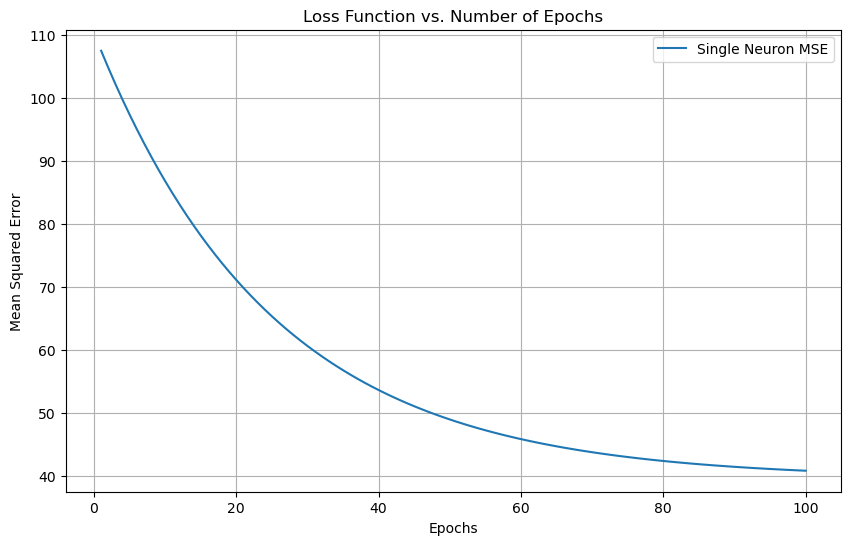

In [557]:
# Plot the loss function as a function of the number of epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), single_neuron.errors, label='Single Neuron MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Loss Function vs. Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()

Looks like our model is learning well. Let's plot the line it came up with to compare the correlation between the two features AH (Actual Humidity) and T (Temperature):

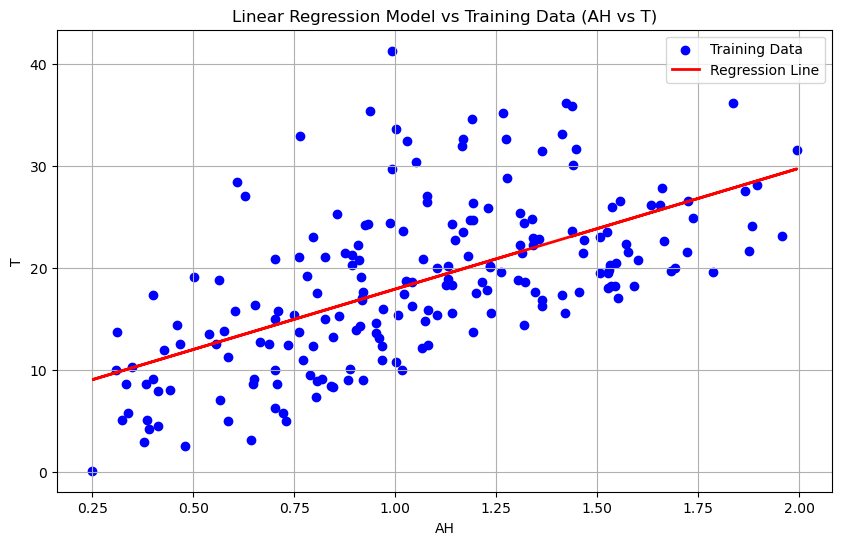

In [558]:
# Predict using the trained LinearRegressionModel
col2_train_pred = lr_model.predict(col1_train_scaled)

# Plot the training data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(col1_train, col2_train, color='blue', label='Training Data')
plt.plot(col1_train, col2_train_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f'Linear Regression Model vs Training Data ({col1} vs {col2})')
plt.legend()
plt.grid(True)
plt.show()

To demonstrate the negative correlation between some two features, we can turn to our correlation matrix once again. It appears that there is a negative relationship between PT08.S3(NOx) and NO2(GT) — let's graph it.

df3 shape: (257, 1)
df4 shape: (257, 1)


/var/folders/y2/tsyh3wpj3mj7zcv4hfd0knl40000gn/T/ipykernel_22673/295303394.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.fillna(X.mean(), inplace=True)
/var/folders/y2/tsyh3wpj3mj7zcv4hfd0knl40000gn/T/ipykernel_22673/295303394.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.fillna(y.mean(), inplace=True)


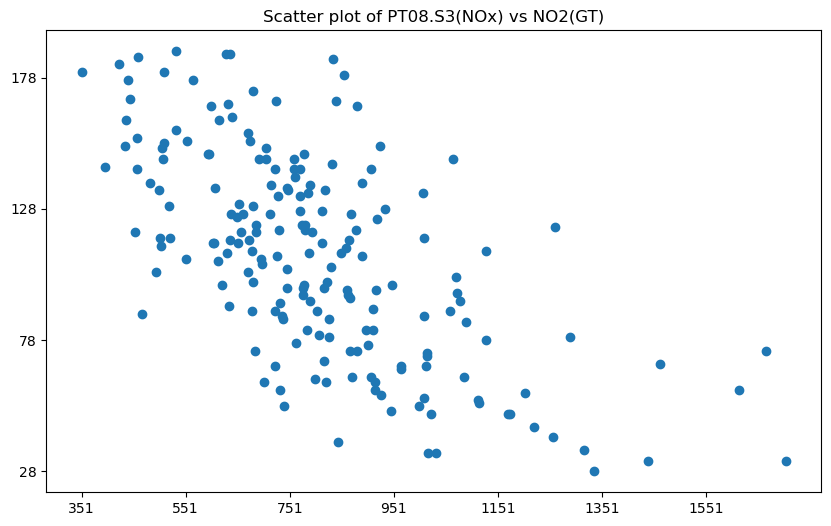

In [559]:

# Specify the column names 
col3 = 'PT08.S3(NOx)'
col4 = 'NO2(GT)'

# Select the first column and assign it to a new DataFrame
df3 = df[[col3]]

# Select the second column and assign it to another new DataFrame
df4 = df[[col4]]

# Convert columns to numeric
df3.loc[:, col3] = pd.to_numeric(df3[col3], errors='coerce')
df4.loc[:, col4] = pd.to_numeric(df4[col4], errors='coerce')

# Handle NaN values (e.g., fill with mean or drop)
df3.fillna(X.mean(), inplace=True)
df4.fillna(y.mean(), inplace=True)

print(f"df3 shape: {df3.shape}")
print(f"df4 shape: {df4.shape}")

# Calculate the z-scores to identify outliers
z_scores_df3 = np.abs((df3[col3] - df3[col3].mean()) / df3[col3].std())
z_scores_df4 = np.abs((df4[col4] - df4[col4].mean()) / df4[col4].std())

# Define a threshold for identifying outliers
threshold_df3 = 3
threshold_df4 = 1

# Filter out the outliers
df3_filtered = df3[z_scores_df3 < threshold_df3]
df4_filtered = df4[z_scores_df4 < threshold_df4]

# Ensure both dataframes are the same size by taking the intersection of their indices
common_indices = df3_filtered.index.intersection(df4_filtered.index)

df3_filtered = df3_filtered.loc[common_indices]
df4_filtered = df4_filtered.loc[common_indices]

# print(f"df3_filtered shape: {df3_filtered.shape}")
# print(f"df4_filtered shape: {df4_filtered.shape}")

min_no2_value = df4_filtered[col4].min()
min_no2_index = df4_filtered[col4].idxmin()

# print(f"Minimum NO2 (GT) value: {min_no2_value} at index {min_no2_index}")


# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df3_filtered[col3], df4_filtered[col4], alpha=1)
plt.title(f'Scatter plot of {col3} vs {col4}')
plt.axis('on')  # Turn on the axis
plt.grid(False)  # Turn off the grid

# Define the tick intervals
x_ticks = np.arange(df3_filtered[col3].min(), df3_filtered[col3].max(), 200)
y_ticks = np.arange(df4_filtered[col4].min(), df4_filtered[col4].max(), 50)

# Set the ticks on the x and y axes
plt.xticks(x_ticks)
plt.yticks(y_ticks)

plt.show()


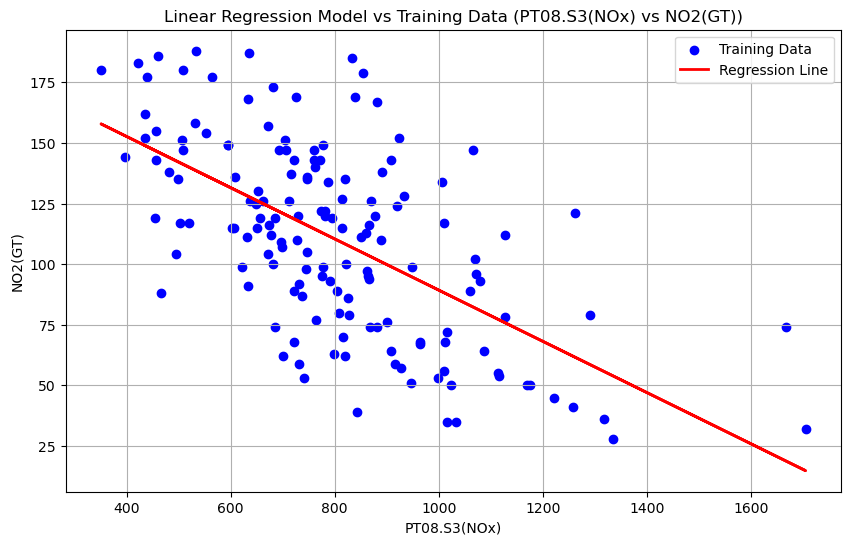

In [560]:
# Ensure all data is numeric
df3_filtered = df3_filtered.apply(pd.to_numeric, errors='coerce')
df4_filtered = df4_filtered.apply(pd.to_numeric, errors='coerce')

# Handle NaN values (e.g., fill with mean or drop)
df3_filtered.fillna(df3_filtered.mean(), inplace=True)
df4_filtered.fillna(df4_filtered.mean(), inplace=True)

# Split the data into training and testing sets
df3_train, df3_test, df4_train, df4_test = train_test_split(df3_filtered, df4_filtered, test_size=0.2, random_state=42)

# Scale the training data
scaler = StandardScaler()
df3_train_scaled = scaler.fit_transform(df3_train)

# Reshape df3_train_scaled to match the expected number of features
df3_train_scaled = df3_train_scaled.reshape(-1, 1)

# Train the LinearRegression model
lr_model = LinearRegression()
lr_model.fit(df3_train_scaled, df4_train.values.ravel())

# Predict using the trained LinearRegression model
df4_train_pred = lr_model.predict(df3_train_scaled)

# Plot the training data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(df3_train, df4_train, color='blue', label='Training Data')
plt.plot(df3_train, df4_train_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel(col3)
plt.ylabel(col4)
plt.title(f'Linear Regression Model vs Training Data ({col3} vs {col4})')
plt.legend()
plt.grid(True)
plt.show()

As anticipated, we get a line with negative slope!

## Other Loss Function Experimentation

We can try some other loss functions. 



1. **Mean Absolute Error (MAE)**  
   
   **Definition:** MAE is the average of the absolute differences between predictions and true values:
   $
   \text{MAE} = \frac{1}{N}\sum_{i=1}^{N} |y_i - \hat{y}_i|
   $
   
   **Use:**  
   - **Robust to Outliers:** MAE is less sensitive to large outliers compared to MSE. Each error contributes proportionally to how far off it is.  
   - **Linear Scale:** Errors grow linearly with the magnitude of the difference, making MAE easy to interpret.

2. **Mean Squared Logarithmic Error (MSLE)**  
   
   **Definition:** MSLE applies a logarithmic transformation before computing the squared difference:
   $
   \text{MSLE} = \frac{1}{N}\sum_{i=1}^{N} (\log(1 + y_i) - \log(1 + \hat{y}_i))^2
   $

   **Use:**  
   - **Relative Errors:** MSLE emphasizes the ratio between predictions and targets rather than their absolute differences.  
   - **Less Punitive for Large Differences in High-Value Targets:** If both $ y $ and $ \hat{y} $ are large, a small relative error results in a low MSLE. If the prediction underestimates a large target value, the error won’t explode as much as in MSE.  
   - **Useful for Exponential Growth Targets:** It’s commonly chosen if you care more about relative differences than absolute differences.

3. **Huber Loss**  
   
   **Definition:** Huber loss is a combination of MAE and MSE. It’s defined as:
   $
   L_\delta(y, \hat{y}) =
   \begin{cases}
   \frac{1}{2}(y - \hat{y})^2 & \text{if } |y - \hat{y}| \le \delta \\
   \delta|y - \hat{y}| - \frac{1}{2}\delta^2 & \text{otherwise}
   \end{cases}
   $

   **Use:**  
   - **Smooth Transition:** For small errors (less than $\delta$), it behaves like MSE, penalizing squared differences. For larger errors, it behaves more like MAE, linearizing the penalty and reducing sensitivity to extreme outliers.  
   - **Best of Both Worlds:** Ideal when you want a balance between the outlier resistance of MAE and the smoother optimization surface of MSE.


---

### Differences:

| Loss Function | Sensitivity to Outliers | Error Metric Style | Use When: |
|---------------|-------------------------|-------------------|----------|
| MAE           | Less sensitive          | Linear absolute differences | Large outliers should not dominate the training |
| MSLE          | Focus on relative errors| Squared differences of logs | Relative performance matters more than absolute differences |
| Huber Loss    | Balanced                | Piecewise (MSE & MAE)       | You want both robustness to outliers and a smoother optimization landscape |





We can Implement these loss functions on our "Absolute Humidity" vs "Temperature" data as follows:

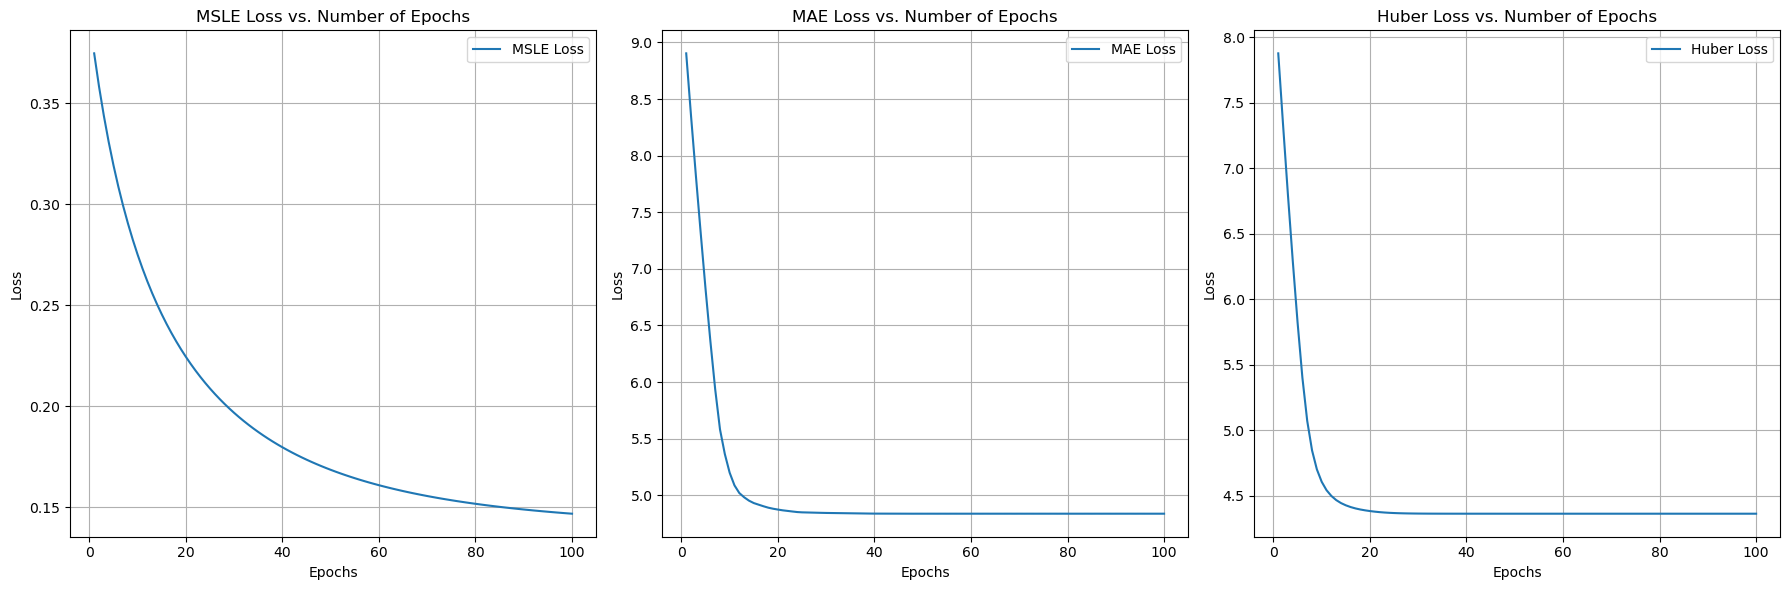

Final MAE Loss: 4.8375
Final MSLE Loss: 0.1467
Final Huber Loss: 4.3621


In [561]:
# Initialize the SingleNeuronLinearRegressor

# Note that much higher learning rates work better for MLSE, MAE, and Huber losses
single_neuron_msle = SingleNeuronLinearRegressor(n_features=col1_train_scaled.shape[1], learning_rate=3)
single_neuron_mae = SingleNeuronLinearRegressor(n_features=col1_train_scaled.shape[1], learning_rate=1)
single_neuron_huber = SingleNeuronLinearRegressor(n_features=col1_train_scaled.shape[1], learning_rate=1)

# Train the models with different loss functions

# Original:
# single_neuron.train(col1_train_scaled, col2_train.values.ravel(), epochs=epochs)

# Scale the feature values
col1_train_scaled = scaler.fit_transform(col1_train)
single_neuron_msle.train_with_msle_loss(col1_train_scaled, col2_train.values.ravel(), epochs=epochs)
single_neuron_mae.train_with_mae_loss(col1_train_scaled, col2_train.values.ravel(), epochs=epochs)
single_neuron_huber.train_with_huber_loss(col1_train_scaled, col2_train.values.ravel(), epochs=epochs)

# Plot the loss functions over the epochs side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot MSLE loss
axs[0].plot(range(1, epochs + 1), single_neuron_msle.msle_errors, label='MSLE Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title('MSLE Loss vs. Number of Epochs')
axs[0].legend()
axs[0].grid(True)

# Plot MAE loss
axs[1].plot(range(1, epochs + 1), single_neuron_mae.mae_errors, label='MAE Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_title('MAE Loss vs. Number of Epochs')
axs[1].legend()
axs[1].grid(True)

# Plot Huber loss
axs[2].plot(range(1, epochs + 1), single_neuron_huber.huber_errors, label='Huber Loss')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Loss')
axs[2].set_title('Huber Loss vs. Number of Epochs')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Calculate and print the final loss values for each loss function
final_mae_loss = single_neuron_mae.mae_errors[-1]
final_msle_loss = single_neuron_msle.msle_errors[-1]
final_huber_loss = single_neuron_huber.huber_errors[-1]

print(f"Final MAE Loss: {final_mae_loss:.4f}")
print(f"Final MSLE Loss: {final_msle_loss:.4f}")
print(f"Final Huber Loss: {final_huber_loss:.4f}")

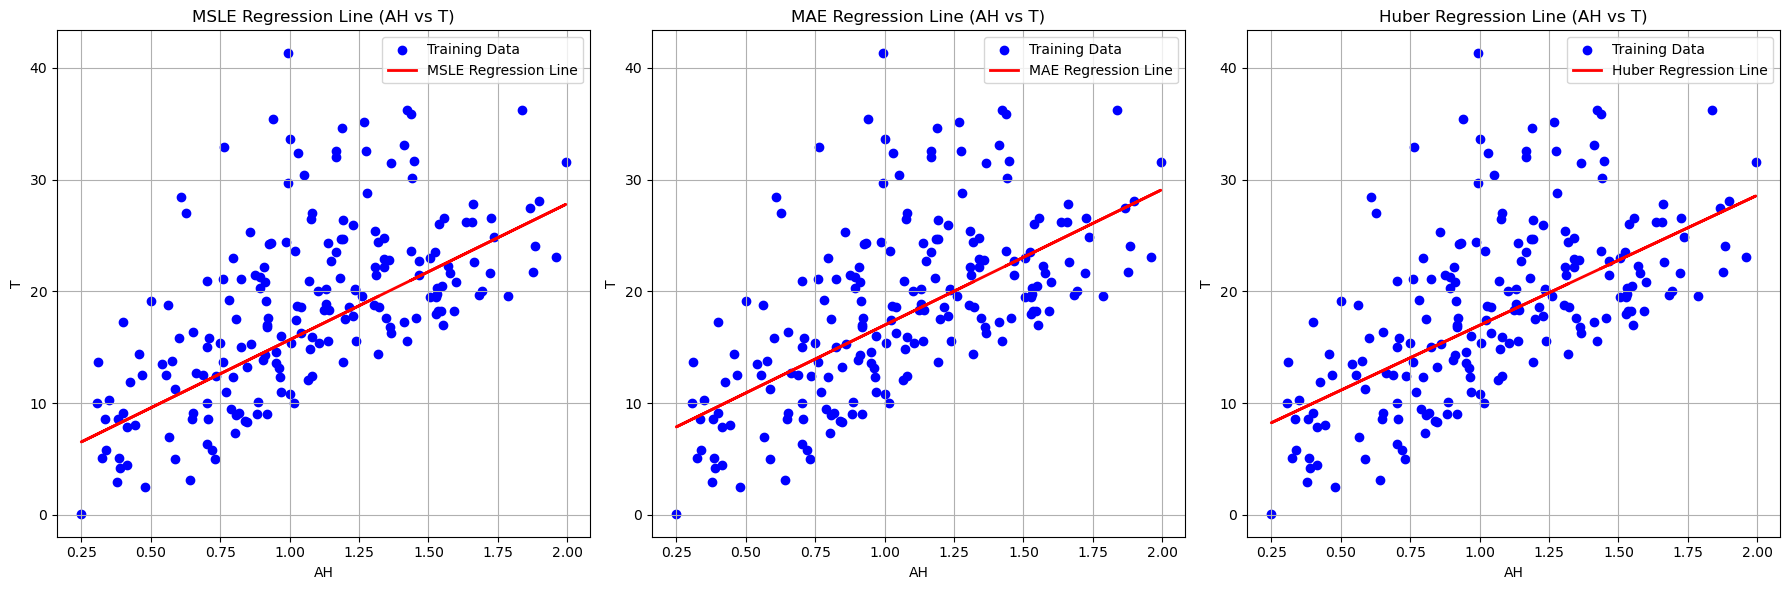

In [562]:

# Predict using the trained models
col2_train_pred_msle = single_neuron_msle.predict(col1_train_scaled)
col2_train_pred_mae = single_neuron_mae.predict(col1_train_scaled)
col2_train_pred_huber = single_neuron_huber.predict(col1_train_scaled)

# Plot the training data and the regression lines for each loss function
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot MSLE regression line
axs[0].scatter(col1_train, col2_train, color='blue', label='Training Data')
axs[0].plot(col1_train, col2_train_pred_msle, color='red', linewidth=2, label='MSLE Regression Line')
axs[0].set_xlabel(col1)
axs[0].set_ylabel(col2)
axs[0].set_title(f'MSLE Regression Line ({col1} vs {col2})')
axs[0].legend()
axs[0].grid(True)

# Plot MAE regression line
axs[1].scatter(col1_train, col2_train, color='blue', label='Training Data')
axs[1].plot(col1_train, col2_train_pred_mae, color='red', linewidth=2, label='MAE Regression Line')
axs[1].set_xlabel(col1)
axs[1].set_ylabel(col2)
axs[1].set_title(f'MAE Regression Line ({col1} vs {col2})')
axs[1].legend()
axs[1].grid(True)

# Plot Huber regression line
axs[2].scatter(col1_train, col2_train, color='blue', label='Training Data')
axs[2].plot(col1_train, col2_train_pred_huber, color='red', linewidth=2, label='Huber Regression Line')
axs[2].set_xlabel(col1)
axs[2].set_ylabel(col2)
axs[2].set_title(f'Huber Regression Line ({col1} vs {col2})')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()